# Business Understanding

The company is expanding into both privatized and commercial aviation to diversify its portfolio. They would like to understand which aircraft types have the lowest risk. 
The "AviationData.csv" dataset provided by the NTSB, that will be explored in this notebook, contains information on selected accidents from 1962 to 2023. These are incidents that have taken place within the United States, its territories and possessions, and in international waters.

**Key/focus questions:**
- Which aircraft types have the lowest accident severity?
- Is a private or commercial flight riskier?
- Are certain conditions (e.g., weather, location) more associated with severe accidents?

**Audience**: Aviation division team and the company's stakeholders eg managers 


In [87]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#importing the dataset
df = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase1/Phase-1-Aviation-Project/data/AviationData.csv", encoding='cp1252')

C:\Users\PC\AppData\Local\Temp\ipykernel_7008\1828067197.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase1/Phase-1-Aviation-Project/data/AviationData.csv", encoding='cp1252')


### Going through the Dataset

In [89]:
#looking into the datasets shape 
df.shape

(88889, 31)

In [90]:
#information on the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [15]:
#data types of the columns 
df.dtypes

Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Da

In [91]:
#looking into the first 5 rows of the dataset to get an idea of the data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [92]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Cleaning the dataset 

Using the head function and looking at the different columns of the dataset, some columns are not required moving forward. 

**Why?** This is because they are not part/helpful in the analysis and will not interfere when forming a data driven conclusion. The columns such as Event Id and Accident number are just for administration purposes and Report status and publication date would be desired for a different type of analysis

In [93]:
#Getting the column names in the dataset

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [94]:
#forming a list of the unrequired columns

unwanted_columns = ['Event.Id', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Registration.Number', 'Accident.Number', 'Report.Status',
       'Publication.Date']
df = df.drop(columns = unwanted_columns)

In [95]:
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,...,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,...,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,...,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,...,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach


In [96]:
# checking for columns with missing values 
missing_count = df.isna().sum()
missing_count

Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [97]:
#checking for the percentages of columns with missing values 
#if it is greater than 50%, the columns are to be dropped

row_number = len(df)

missing_percentage = (missing_count / row_number) * 100
missing_percentage.sort_values(ascending = True)

Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.058500
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Weather.Condition          5.053494
Total.Uninjured            6.650992
Number.of.Engines          6.844491
Purpose.of.flight          6.965991
Engine.Type                7.982990
Total.Fatal.Injuries      12.826109
Total.Minor.Injuries      13.424608
Total.Serious.Injuries    14.073732
Broad.phase.of.flight     30.560587
Aircraft.Category         63.677170
FAR.Description           63.974170
Air.carrier               81.271023
Schedule                  85.845268
dtype: float64

In [98]:
#dropping the columns with high percentage of missing values

df = df.drop(columns = ['Schedule', 'Air.carrier', 'FAR.Description'])
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [99]:
df.shape

(88889, 19)

In [100]:
#Checking for duplicates in the data 

df.duplicated().value_counts()

False    88854
True        35
Name: count, dtype: int64

In [101]:
#dropping the duplicates 

df = df.drop_duplicates()
df.shape

(88854, 19)

In [102]:
#rechecking duplicates 
df.duplicated().value_counts()

False    88854
Name: count, dtype: int64

#### Filling in the missing values 

Working according to the data types i.e, categorical or numerical, and the outliers.

In [103]:
df.dtypes 

Investigation.Type         object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
dtype: object

In [49]:
df.isna().sum().sort_values(ascending = True)

Investigation.Type            0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Amateur.Built               102
Country                     226
Injury.Severity             998
Aircraft.damage            3191
Weather.Condition          4490
Total.Uninjured            5908
Number.of.Engines          6080
Purpose.of.flight          6189
Engine.Type                7093
Total.Fatal.Injuries      11398
Total.Minor.Injuries      11926
Total.Serious.Injuries    12503
Broad.phase.of.flight     27158
Aircraft.Category         56577
dtype: int64

#### Handling the numerical columns 

- First step will be describing the numerical columns and see if their mean and any outliers
- Fill the missing values using an appropriate and logical manner

After handling the missing data:
- Plotting graphs to visualise these outliers
- Handling the outliers if present
- Plot a graph to indicate the difference

In [107]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [108]:
#creating a list of the columns which are float as indicated above 
float_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
float_columns

['Number.of.Engines',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured']

- Due to an error faced later as your filling in the missing values, converting to numeric is required since the columns are float
- This means using the pd.to_numeric function 

In [109]:
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [111]:
for col in float_columns:
    print(df[col].dtype)

float64
float64
float64
float64
float64


In [112]:
#use a for loop to describe each of the columns in the above list to see their properties 

for col in float_columns:
    print(f"{col} description:") 
    print(df[col].describe())
    print("\n") #having line between each descruption 

Number.of.Engines description:
count    82774.000000
mean         1.146556
std          0.446518
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64


Total.Fatal.Injuries description:
count    77456.000000
mean         0.647826
std          5.487038
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64


Total.Serious.Injuries description:
count    76351.000000
mean         0.279892
std          1.544285
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        161.000000
Name: Total.Serious.Injuries, dtype: float64


Total.Minor.Injuries description:
count    76928.000000
mean         0.357061
std          2.235891
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        380.000000
Name: Total.Minor.Injuries,

In [113]:
#calculating the median of the float columns 

for col in float_columns:
    print(f"Median for {col}:")
    print(df[col].median())
    print("\n")

Median for Number.of.Engines:
1.0


Median for Total.Fatal.Injuries:
0.0


Median for Total.Serious.Injuries:
0.0


Median for Total.Minor.Injuries:
0.0


Median for Total.Uninjured:
1.0




From the results above:
- The number of engines is mostly 1. This is the suitable number to use to fill in the missing values in the rows for the Number of engine column
- For injury based columns (the other 4 float columns), missing values means that the injuries were not collected/noted down. Therefore cannot fill in the missing values using the median/mean as it will not be accurate/correct assumption. 

In [114]:
#filling in the missing values 

#filling in the no.of.engines column
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

In [116]:
# other 4 columns that are to be filled with 0 
four_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in four_columns:
    df[col] = df[col].fillna(0)

In [119]:
#checking if they have been filled 
df[float_columns].isnull().sum()

Number.of.Engines         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

- Able to handle the missing values in the numerical columns and now proceed to handle the outliers based on the results from the describe function

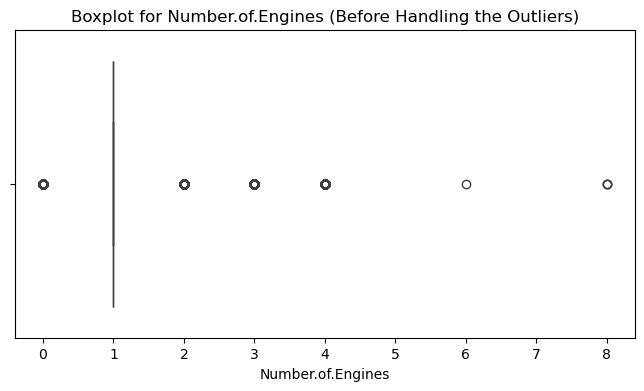

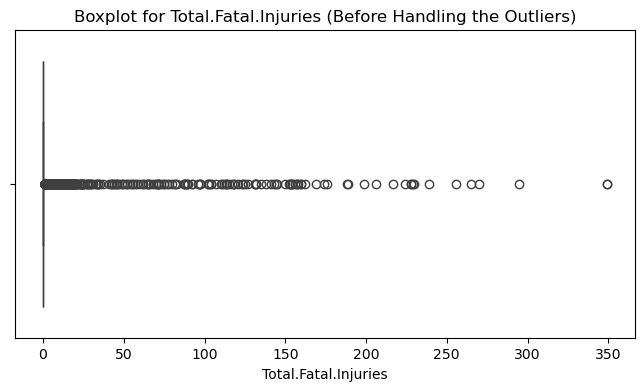

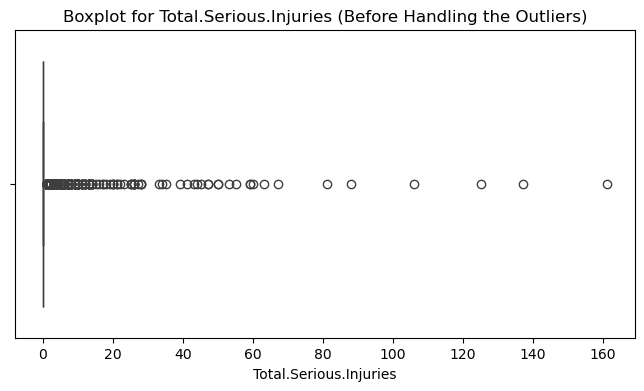

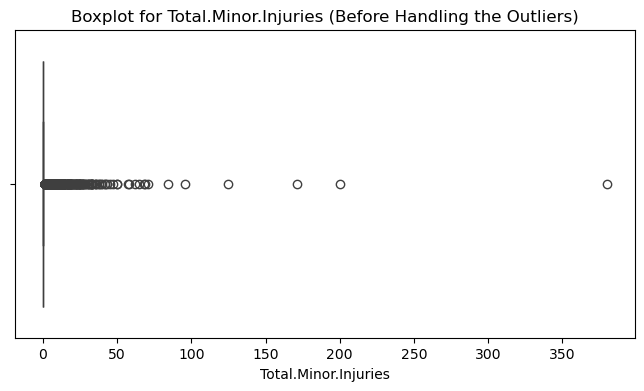

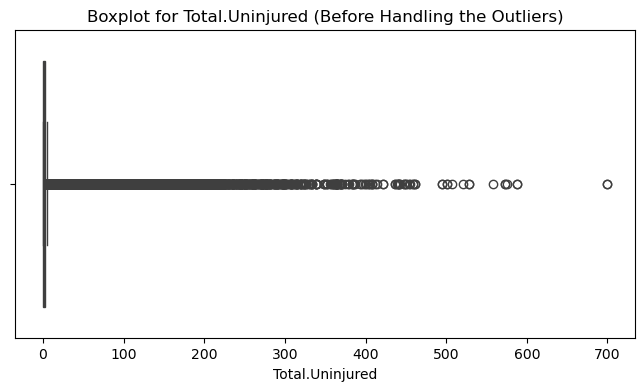

In [121]:
# create a boxplot to visualise the outliers in each of the float columns in the list formed 
for col in float_columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot for {col} (Before Handling the Outliers)')
    plt.show()

- We can now visually notice that there are outliers present in the numerical columns that need to be dealt with

In [125]:
# removing the outliers in the float columns 

for col in float_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

# for correcting the dataframe without outliers present     
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [126]:
df.shape

(37805, 19)

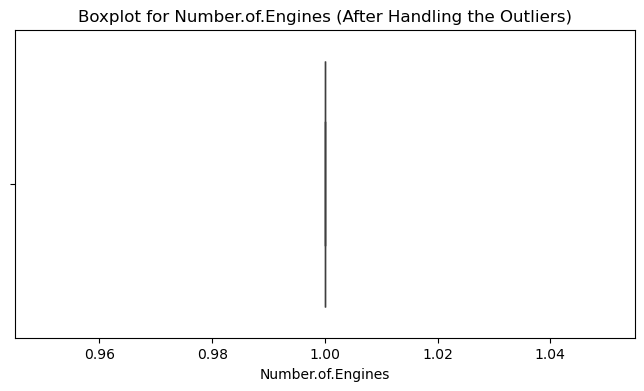

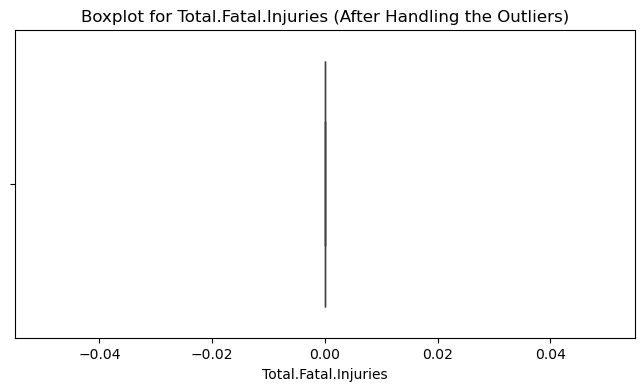

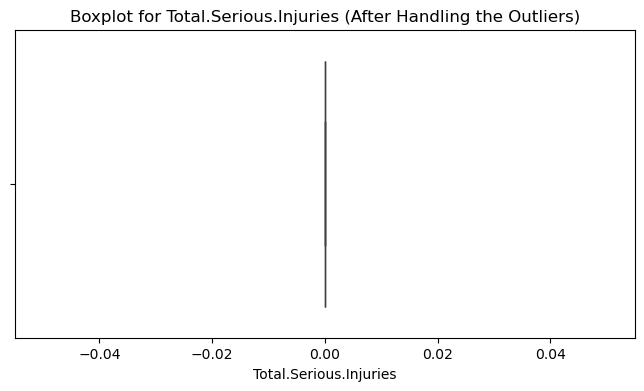

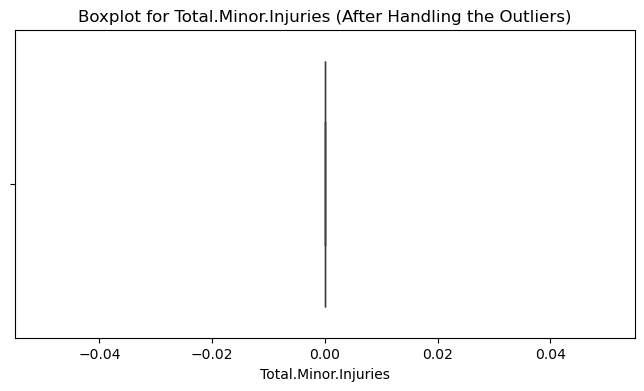

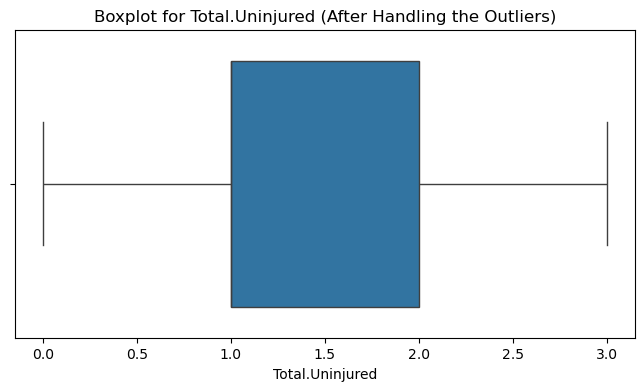

In [127]:
# plotting after handling the colums outliers

for col in float_columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot for {col} (After Handling the Outliers)')
    plt.show()

In [128]:
# lastly can deescribe and see if the outliers are still present 

for col in float_columns:
    print(f"{col} description:") 
    print(df[col].describe())
    print("\n") #having line between each descruption 

Number.of.Engines description:
count    37805.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Number.of.Engines, dtype: float64


Total.Fatal.Injuries description:
count    37805.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Total.Fatal.Injuries, dtype: float64


Total.Serious.Injuries description:
count    37805.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Total.Serious.Injuries, dtype: float64


Total.Minor.Injuries description:
count    37805.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Total.Minor.Injuries, dtype: float64


Total.Uninjured description:
count    37805.000000
mean         1.480122
std          0.677462
min          0.000000
25%          1.000000
50%

#### Categorical data